In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('zyj_1.28.csv')


df1 = data[['Zeta potential','Pore Radius','压力/bar','盐浓度/ppm','染料浓度/ppm','MgCl2','Congo Red','纯水通量','MgCl2/Congo Red']].copy()

print(df1)
df1.to_csv('d_mgcl2-congo.csv',encoding='utf-8-sig',index=False)

     Zeta potential  Pore Radius  压力/bar  盐浓度/ppm  染料浓度/ppm  MgCl2  Congo Red  \
0        -53.000000     0.778221       4     1000       500  93.50       0.47   
1        -42.000000     3.760603       4     1000       500  67.00       1.74   
2        -56.000000     1.784175       4     1000       500  89.50       0.50   
3        -48.000000     0.573732       4     1000       500  97.44       0.69   
4        -23.000000    11.600000       5     1000       100  98.00       0.65   
..              ...          ...     ...      ...       ...    ...        ...   
169      -37.286674     0.732441       4     1000       500  97.70       1.23   
170      -10.660000     0.400000       5     2000       230  77.00       0.32   
171       -1.050000     0.390000       5     2000       230  72.57       0.30   
172       -0.440000     0.390000       5     2000       230  73.27       0.34   
173      -31.117483     9.632131       4     1000       100  85.49       0.20   

      纯水通量  MgCl2/Congo Red

C:\Users\12806\AppData\Local\Temp\ipykernel_12260\1115149610.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_predict['MgCl2'] = predicted_nacl


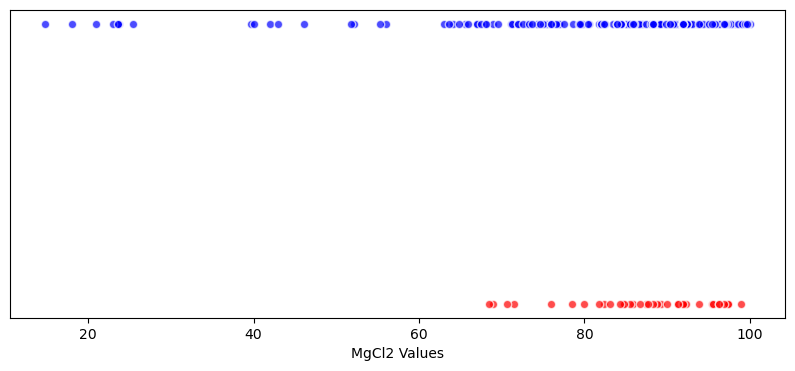

In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
# 加载数据
file_path = 'd_mgcl2-congo.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)

# 清洗数据
data_clean = data.dropna(subset=['MgCl2'])  # 移除NaCl缺失的行
data_predict = data[data['MgCl2'].isna()]   # 只保留NaCl缺失的行

# 准备训练和测试数据
features = ['Pore Radius', 'Zeta potential', '压力/bar', '盐浓度/ppm']
X_train = data_clean[features]
y_train = data_clean['MgCl2']
X_predict = data_predict[features]

# 数据标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_predict_scaled = scaler.transform(X_predict)

# 训练SVM模型
model = SVR(C=200, gamma=5, kernel='rbf')
model.fit(X_train_scaled, y_train)

# 预测缺失的NaCl值
predicted_nacl = model.predict(X_predict_scaled)
data_predict['MgCl2'] = predicted_nacl

# 将预测值填回原数据集
data_filled = pd.concat([data_clean, data_predict]).sort_index()

data_filled.to_csv('d_mgcl2-congo.csv', index=False,encoding='utf-8-sig')

plt.figure(figsize=(10, 4))

plt.scatter(data_clean['MgCl2'], np.ones(len(data_clean['MgCl2'])), alpha=0.7, color='blue', edgecolor='white')

plt.scatter(predicted_nacl, np.zeros(len(predicted_nacl)), alpha=0.7, color='red', edgecolor='white')

plt.xlabel('MgCl2 Values')

plt.yticks([])

plt.show()


In [2]:
import pandas as pd
import numpy as np

file_path = 'd_mgcl2-congo.csv'  
data = pd.read_csv(file_path)
data['MgCl2/Congo Red'] = data['MgCl2'] / data['Congo Red'].round(2)

#data.replace([np.inf, -np.inf], np.nan, inplace=True)

data.to_csv(file_path, index=False,encoding='utf-8-sig')


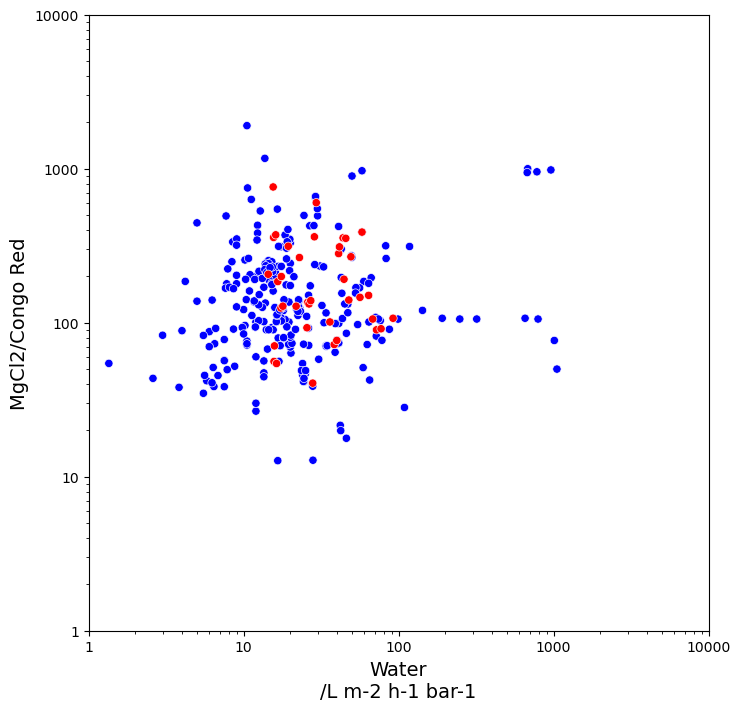

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 加载CSV文件
data = pd.read_csv('d_mgcl2-congo.csv')

# 确保数据中没有0或负数，对数刻度无法处理这些值
data = data[(data['纯水通量'] > 0) & (data['MgCl2/Congo Red'] > 0)]

# 添加颜色列，小于等于157索引为蓝色，其他为红色
data['color'] = ['blue' if idx <= 267 else 'red' for idx in data.index]

# 绘制散点图
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x='纯水通量', y='MgCl2/Congo Red', hue='color', palette={'blue':'blue', 'red':'red'}, data=data, legend=False)

# 设置对数刻度
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000])
ax.set_yticks([1, 10, 100, 1000, 10000])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())

plt.xlabel('Water\n/L m-2 h-1 bar-1', fontsize=14)
plt.ylabel('MgCl2/Congo Red', fontsize=14)

ax.set_xlim(10**0, 10**4)
ax.set_ylim(10**0, 10**4)
plt.show()
